In [1]:
import statsmodels.api as sm
from sklearn import datasets ## imports datasets from scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)

# Load Dataset

In [56]:
# Or we can directly read it from a csv file
df_target = pd.read_csv('boston_data.csv')
df_target

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48,22.00


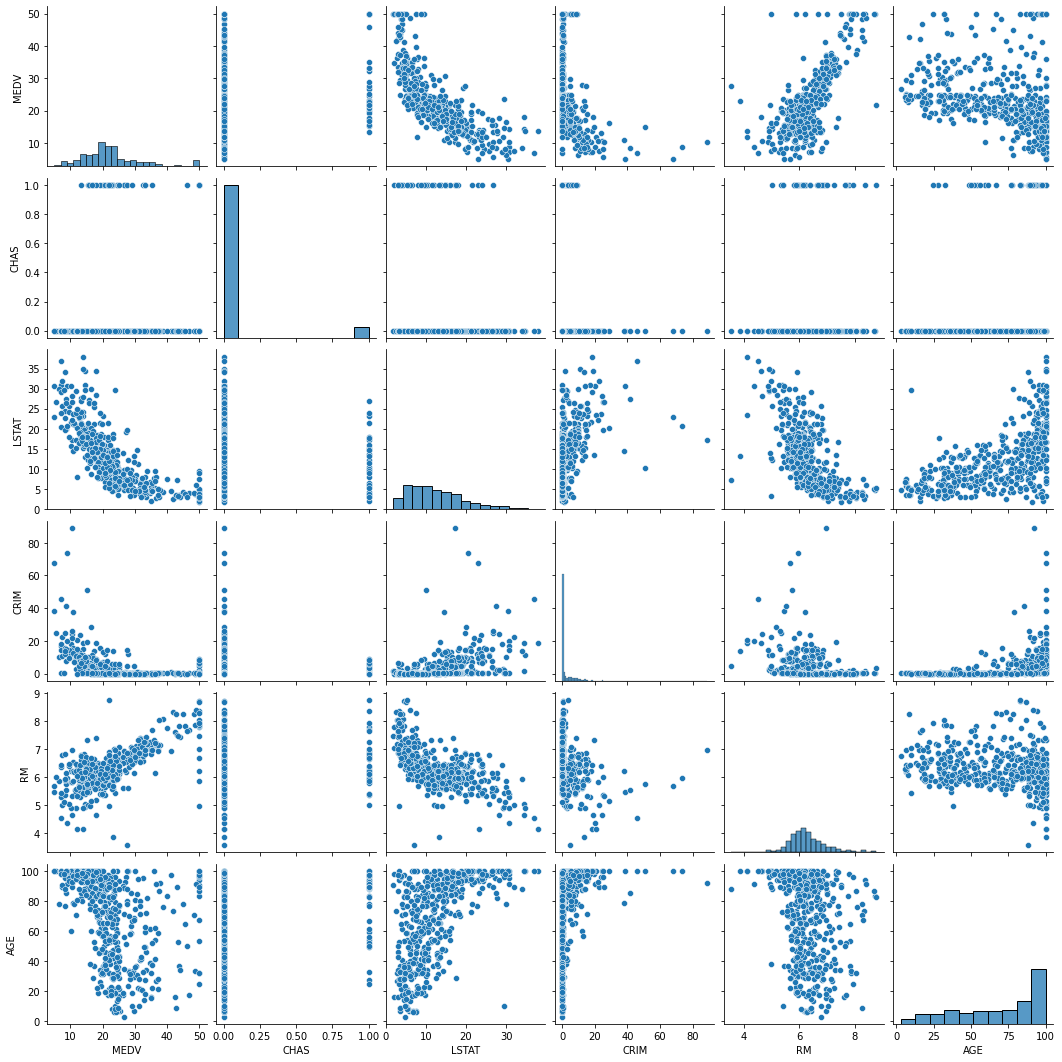

In [57]:
import seaborn as sns
sns.pairplot(df_target[['MEDV','CHAS','LSTAT','CRIM','RM','AGE']])
plt.show()

# Validataion Set Approach

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [100]:
# Prepare predictor and response variables
X = sm.add_constant(df_target['RM'])  # Adds an intercept term
y = df_target['MEDV']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit the OLS model on the training set
model_train = sm.OLS(y_train, X_train).fit()

# Predict on the test set
y_pred = model_train.predict(X_test)

# Calculate Mean Squared Error on the test set
mse_val = mean_squared_error(y_test, y_pred)
print("Validation Set MSE:", mse_val)

Validation Set MSE: 40.74441386633471


# Cross Validation

In [95]:
from sklearn.model_selection import KFold

### Manually

In [ ]:
X = sm.add_constant(df_target['RM'])
y = df_target['MEDV']

# Initialize KFold with 5 splits, shuffling the data for randomness
kf = KFold(n_splits=5, shuffle=True, random_state=1)
mse_list = []  # List to store the MSE for each fold

# Iterate over each fold
for train_index, test_index in kf.split(X):
    # Create training and test sets for this fold using .iloc for DataFrame indexing
    X_train = X.iloc[train_index] # .iloc方法根据索引值提取相应位置的数值
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    # Fit the OLS model on the training fold
    model = sm.OLS(y_train, X_train).fit()
    
    # Predict on the test fold
    y_pred = model.predict(X_test)
    
    # Calculate the MSE for this fold and append it to the list
    mse_fold = mean_squared_error(y_test, y_pred)
    mse_list.append(mse_fold)

# Compute the average MSE across all folds
mse = np.mean(mse_list)
print("Cross-Validation MSE:", mse)

Cross-Validation MSE: 44.24420856915766


### Simpler Way

In [114]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Prepare the data: use 'RM' as predictor and 'MEDV' as response.
X = df_target[['RM']]  # X should be a DataFrame (or array) with predictors
y = df_target['MEDV']  # y is the target variable

# Initialize the LinearRegression model (sklearn automatically fits an intercept)
model = LinearRegression()

# Create a KFold cross-validation object with a fixed random seed
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform 5-fold cross-validation using negative mean squared error as the scoring metric
neg_mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE by taking the negative, and then compute the average
mse_scores = -neg_mse_scores
average_mse = np.mean(mse_scores)

print("Cross-Validation MSE:", average_mse)

Cross-Validation MSE: 44.24420856915767


# Bootstrap

In [ ]:
from sklearn.utils import resample

In [59]:
X = sm.add_constant(df_target['RM'])  # Add constant to predictor for the intercept
y = df_target['MEDV']
model = sm.OLS(y, X).fit()  # Fit the ordinary least squares (OLS) model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           2.49e-74
Time:                        13:36:59   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Function to perform simple linear regression and return the coefficients
def regress(df):
    X = sm.add_constant(df['RM'])  # Add constant to predictor for the intercept
    y = df['MEDV']
    model = sm.OLS(y, X).fit()  # Fit the ordinary least squares (OLS) model
    return model.params['const'], model.params['RM']

# Bootstrap parameters
n_bootstraps = 1000
seed = 42  # For reproducibility

np.random.seed(seed)
bootstrap_results_list = []

for i in range(n_bootstraps):
    sample = resample(df_target, replace=True)
    result = regress(sample)
    bootstrap_results_list.append(result)

bootstrap_results = np.array(bootstrap_results_list)

# Calculating the standard errors
bootstrap_se = bootstrap_results.std(axis=0)

print(f"Bootstrap standard error for beta_0 (intercept): {bootstrap_se[0]:.4f}")
print(f"Bootstrap standard error for beta_1 (slope): {bootstrap_se[1]:.4f}")

Bootstrap standard error for beta_0 (intercept): 4.1873
Bootstrap standard error for beta_1 (slope): 0.6637


In [61]:
bootstrap_results

array([[-38.81024526,   9.76779355],
       [-29.64282246,   8.38767195],
       [-33.06985766,   8.86141252],
       ...,
       [-35.36320824,   9.11282709],
       [-32.88160662,   8.78459945],
       [-42.09728649,  10.26605288]])

### Manually generate a dataset

In [62]:
# Set seed for reproducibility
np.random.seed(42)

# Generate dataset with 500 samples that follows model assumptions
n_samples = 500
x = np.random.uniform(-10, 10, size=n_samples)  # Predictor variable, uniformly distributed
epsilon = np.random.normal(0, 2, size=n_samples)  # Normally distributed noise

# Assuming a true linear model: y = 2x + 1 + epsilon
beta_0 = 1  # Intercept
beta_1 = 2  # Slope
y = beta_0 + beta_1 * x + epsilon  # Response variable

# Create a DataFrame
df = pd.DataFrame({'RM': x, 'MEDV': y})

In [63]:
df

,RM,MEDV
0,-2.51,-3.33
1,9.01,22.78
2,4.64,12.18
3,1.97,3.79
4,-6.88,-14.56
...,...,...
495,-2.93,-5.93
496,1.67,3.37
497,-8.45,-13.80
498,9.49,21.34


In [64]:
X = sm.add_constant(df['RM'])  # Add constant to predictor for the intercept
y = df['MEDV']
model = sm.OLS(y, X).fit()  # Fit the ordinary least squares (OLS) model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.801e+04
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:37:14   Log-Likelihood:                -1057.9
No. Observations:                 500   AIC:                             2120.
Df Residuals:                     498   BIC:                             2128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0159      0.090     11.293      0.000       0.839       1.193
RM             2.0230      0.015    134.210      0.000       1.993       2.053
==============================================================================
Omnibus:                        2.682   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.262   Jarque-Bera (JB):                2.695
Skew:                           0.145   Prob(JB):                        0.260
Kurtosis:                       2.786   Cond. No.                         5.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Bootstrap parameters
n_bootstraps = 1000
seed = 42  # For reproducibility

np.random.seed(seed)
bootstrap_results_list = []

for i in range(n_bootstraps):
    sample = resample(df, replace=True)
    result = regress(sample)
    bootstrap_results_list.append(result)

bootstrap_results = np.array(bootstrap_results_list)

# Calculating the standard errors
bootstrap_se = bootstrap_results.std(axis=0)

print(f"Bootstrap standard error for beta_0 (intercept): {bootstrap_se[0]:.4f}")
print(f"Bootstrap standard error for beta_1 (slope): {bootstrap_se[1]:.4f}")

Bootstrap standard error for beta_0 (intercept): 0.0877
Bootstrap standard error for beta_1 (slope): 0.0154


# Compare Nested Models

In [66]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

In [67]:
# Or we can directly read it from a csv file
df_target = pd.read_csv('boston_data.csv')
df_target

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48,22.00


In [68]:
model_1 = smf.ols(formula='MEDV ~ CHAS + np.log(LSTAT)', data=df_target).fit()
model_2 = smf.ols(formula='MEDV ~ CHAS + np.log(LSTAT) + RM + AGE', data=df_target).fit()

In [69]:
anovaResults = anova_lm(model_1, model_2)
print(anovaResults) 
# Notes:
# 1. You can ignore the warnings. The warnings are because the values in the first line are empty (NaN). 
#    numpy package will issue warnings for NaN values
# 2. ssr in the output are RSS or SSE

   df_resid      ssr  df_diff  ss_diff     F  Pr(>F)
0    503.00 13745.63     0.00      NaN   NaN     NaN
1    501.00 11774.84     2.00  1970.79 41.93    0.00


# Best Subset Selection

In [70]:
# First create some dummy variables for categorical variables. This is another way of including categorical varaibles
df_dummy = pd.get_dummies(df_target, columns = ['CHAS'],drop_first = True, dtype=int) # Change categorical to one-hot
df_dummy.head(5)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_1.0
0,0.01,18.00,2.31,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00,0
1,0.03,0.00,7.07,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60,0
2,0.03,0.00,7.07,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70,0
3,0.03,0.00,2.18,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40,0
4,0.07,0.00,2.18,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20,0


In [71]:
import itertools
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

In [72]:
#Initialization variables
y = df_target['MEDV']
X = df_dummy.drop(columns=['ZN','INDUS','NOX','RAD','MEDV']) # we don't include these variables in X

p = 9
RSS_list, R_squared_list, adj_R_squared_list, AIC_list, BIC_list, feature_list = [],[],[],[],[],[]
numb_features = []

#Looping over k = 1 to k = 9 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'): # note that for python range(2) = 0,1

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        X_c = sm.add_constant(X[list(combo)])       # we need to add constant term using sm.OLS
        model = sm.OLS(y, X_c).fit()                # run the regression model
        
        RSS_list.append(model.ssr)                  # model.ssr is the sum of squared residuals
        R_squared_list.append(model.rsquared)
        adj_R_squared_list.append(model.rsquared_adj)
        AIC_list.append(model.aic)
        BIC_list.append(model.bic)
        feature_list.append(combo)
        numb_features.append(k)   

# Store the results in DataFrame
df_results = pd.DataFrame({'numb_features': numb_features,'features':feature_list, 'RSS': RSS_list,'R_squared':R_squared_list,'adj_R_squared':adj_R_squared_list,'AIC':AIC_list,'BIC':BIC_list})

Loop...:   0%|          | 0/9 [00:00<?, ?it/s]

In [73]:
# Keep two decimal places
# numeric_cols = df_results.select_dtypes(include=[np.number]).columns
# df_results[numeric_cols] = df_results[numeric_cols].applymap(lambda x: f"{x:.2f}")

# Show results
df_results.head(15)

,numb_features,features,RSS,R_squared,adj_R_squared,AIC,BIC
0,1,"(CRIM,)",36275.51,0.15,0.15,3601.78,3610.23
1,1,"(RM,)",22061.88,0.48,0.48,3350.15,3358.60
2,1,"(AGE,)",36646.53,0.14,0.14,3606.93,3615.38
3,1,"(DIS,)",40048.05,0.06,0.06,3651.84,3660.30
4,1,"(TAX,)",33338.96,0.22,0.22,3559.07,3567.52
5,1,"(PTRATIO,)",31702.01,0.26,0.26,3533.59,3542.04
6,1,"(B,)",37966.41,0.11,0.11,3624.83,3633.29
7,1,"(LSTAT,)",19472.38,0.54,0.54,3286.97,3295.43
8,1,"(CHAS_1.0,)",41404.22,0.03,0.03,3668.69,3677.15
9,2,"(CRIM, RM)",19565.81,0.54,0.54,3291.40,3304.08


In [74]:
df_results.tail(15)

,numb_features,features,RSS,R_squared,adj_R_squared,AIC,BIC
496,7,"(RM, AGE, DIS, TAX, B, LSTAT, CHAS_1.0)",13473.48,0.68,0.68,3112.63,3146.44
497,7,"(RM, AGE, DIS, PTRATIO, B, LSTAT, CHAS_1.0)",12397.81,0.71,0.71,3070.53,3104.34
498,7,"(RM, AGE, TAX, PTRATIO, B, LSTAT, CHAS_1.0)",12938.35,0.70,0.69,3092.12,3125.93
499,7,"(RM, DIS, TAX, PTRATIO, B, LSTAT, CHAS_1.0)",12407.37,0.71,0.71,3070.92,3104.73
500,7,"(AGE, DIS, TAX, PTRATIO, B, LSTAT, CHAS_1.0)",15249.22,0.64,0.64,3175.27,3209.09
501,8,"(CRIM, RM, AGE, DIS, TAX, PTRATIO, B, LSTAT)",12501.38,0.71,0.70,3076.74,3114.78
502,8,"(CRIM, RM, AGE, DIS, TAX, PTRATIO, B, CHAS_1.0)",14805.45,0.65,0.65,3162.33,3200.37
503,8,"(CRIM, RM, AGE, DIS, TAX, PTRATIO, LSTAT, CHAS...",12567.02,0.71,0.70,3079.39,3117.43
504,8,"(CRIM, RM, AGE, DIS, TAX, B, LSTAT, CHAS_1.0)",13412.13,0.69,0.68,3112.32,3150.36
505,8,"(CRIM, RM, AGE, DIS, PTRATIO, B, LSTAT, CHAS_1.0)",12297.91,0.71,0.71,3068.43,3106.47


In [75]:
# Get the minimum RSS for each numb_features
# Here we group by numb_features
idx_min_rss = df_results.groupby('numb_features')['RSS'].idxmin()
df_minRSS = df_results.loc[idx_min_rss]
df_minRSS

,numb_features,features,RSS,R_squared,adj_R_squared,AIC,BIC
7,1,"(LSTAT,)",19472.38,0.54,0.54,3286.97,3295.43
22,2,"(RM, LSTAT)",15439.31,0.64,0.64,3171.54,3184.22
89,3,"(RM, PTRATIO, LSTAT)",13727.99,0.68,0.68,3114.10,3131.00
205,4,"(RM, DIS, PTRATIO, LSTAT)",13228.91,0.69,0.69,3097.36,3118.49
351,5,"(RM, DIS, PTRATIO, B, LSTAT)",12726.27,0.70,0.70,3079.76,3105.12
456,6,"(RM, DIS, PTRATIO, B, LSTAT, CHAS_1.0)",12495.08,0.71,0.70,3072.48,3102.07
497,7,"(RM, AGE, DIS, PTRATIO, B, LSTAT, CHAS_1.0)",12397.81,0.71,0.71,3070.53,3104.34
505,8,"(CRIM, RM, AGE, DIS, PTRATIO, B, LSTAT, CHAS_1.0)",12297.91,0.71,0.71,3068.43,3106.47
510,9,"(CRIM, RM, AGE, DIS, TAX, PTRATIO, B, LSTAT, C...",12264.20,0.71,0.71,3069.04,3111.31


In [76]:
# Get max R^2 for each numb_features. 
# We can verify that it is the same as min RSS
idx_max_rsqr = df_results.groupby('numb_features')['R_squared'].idxmax()
df_maxRsqr = df_results.loc[idx_max_rsqr]
df_maxRsqr

,numb_features,features,RSS,R_squared,adj_R_squared,AIC,BIC
7,1,"(LSTAT,)",19472.38,0.54,0.54,3286.97,3295.43
22,2,"(RM, LSTAT)",15439.31,0.64,0.64,3171.54,3184.22
89,3,"(RM, PTRATIO, LSTAT)",13727.99,0.68,0.68,3114.10,3131.00
205,4,"(RM, DIS, PTRATIO, LSTAT)",13228.91,0.69,0.69,3097.36,3118.49
351,5,"(RM, DIS, PTRATIO, B, LSTAT)",12726.27,0.70,0.70,3079.76,3105.12
456,6,"(RM, DIS, PTRATIO, B, LSTAT, CHAS_1.0)",12495.08,0.71,0.70,3072.48,3102.07
497,7,"(RM, AGE, DIS, PTRATIO, B, LSTAT, CHAS_1.0)",12397.81,0.71,0.71,3070.53,3104.34
505,8,"(CRIM, RM, AGE, DIS, PTRATIO, B, LSTAT, CHAS_1.0)",12297.91,0.71,0.71,3068.43,3106.47
510,9,"(CRIM, RM, AGE, DIS, TAX, PTRATIO, B, LSTAT, C...",12264.20,0.71,0.71,3069.04,3111.31


In [77]:
# Adding columns to the dataframe with RSS and R squared values of the best subset
# This is for plotting purpose only
df_results['min_RSS'] = df_results.groupby('numb_features')['RSS'].transform(min)
df_results['max_R_squared'] = df_results.groupby('numb_features')['R_squared'].transform(max)
df_results.head(15)

,numb_features,features,RSS,R_squared,adj_R_squared,AIC,BIC,min_RSS,max_R_squared
0,1,"(CRIM,)",36275.51,0.15,0.15,3601.78,3610.23,19472.38,0.54
1,1,"(RM,)",22061.88,0.48,0.48,3350.15,3358.60,19472.38,0.54
2,1,"(AGE,)",36646.53,0.14,0.14,3606.93,3615.38,19472.38,0.54
3,1,"(DIS,)",40048.05,0.06,0.06,3651.84,3660.30,19472.38,0.54
4,1,"(TAX,)",33338.96,0.22,0.22,3559.07,3567.52,19472.38,0.54
5,1,"(PTRATIO,)",31702.01,0.26,0.26,3533.59,3542.04,19472.38,0.54
6,1,"(B,)",37966.41,0.11,0.11,3624.83,3633.29,19472.38,0.54
7,1,"(LSTAT,)",19472.38,0.54,0.54,3286.97,3295.43,19472.38,0.54
8,1,"(CHAS_1.0,)",41404.22,0.03,0.03,3668.69,3677.15,19472.38,0.54
9,2,"(CRIM, RM)",19565.81,0.54,0.54,3291.40,3304.08,15439.31,0.64


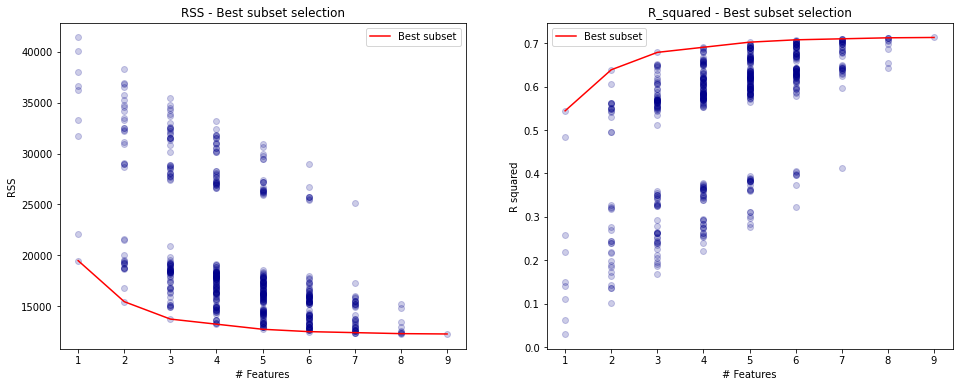

In [78]:
# Create a figure object for plotting, with specified dimensions (width=16, height=6 inches).
fig = plt.figure(figsize=(16,6))

# Add a subplot to the figure for plotting RSS (Residual Sum of Squares). 
# The parameters (1, 2, 1) mean there will be 1 row of plots, 2 columns, and this is the first plot.
ax = fig.add_subplot(1, 2, 1)
ax.scatter(df_results.numb_features, df_results.RSS, alpha=.2, color='darkblue')  # Scatter plot for RSS vs. number of features with dark blue color and some transparency.
ax.plot(df_results.numb_features, df_results.min_RSS, color='r', label='Best subset')  # Line plot for the minimum RSS across number of features, in red.
ax.set_xlabel('# Features')  # Set x-axis label as '# Features'.
ax.set_ylabel('RSS')  # Set y-axis label as 'RSS'.
ax.set_title('RSS - Best subset selection')  # Set the title of the subplot.
ax.legend()  # Display the legend.

ax = fig.add_subplot(1, 2, 2)  # Add another subplot for R^2 with 1 row, 2 columns, at position 2.
ax.scatter(df_results.numb_features, df_results.R_squared, alpha=.2, color='darkblue')  # Scatter plot for R^2 vs. number of features with dark blue color and some transparency.
ax.plot(df_results.numb_features, df_results.max_R_squared, color='r', label='Best subset')  # Line plot for the maximum R^2 across number of features, in red.
ax.set_xlabel('# Features')  # Set x-axis label as '# Features'.
ax.set_ylabel('R squared')  # Set y-axis label as 'R squared'.
ax.set_title('R_squared - Best subset selection')  # Set the title of the subplot.
ax.legend()  # Display the legend.

plt.show()  # Display the figure with both subplots.


In [79]:
standards = ['AIC','BIC','adj_R_squared']  # Define the criteria for model selection.
df_maxRsqr.index = df_maxRsqr.numb_features  # Set the DataFrame index to the number of features for easier plotting.
df_maxRsqr

,numb_features,features,RSS,R_squared,adj_R_squared,AIC,BIC
numb_features,,,,,,,
1,1,"(LSTAT,)",19472.38,0.54,0.54,3286.97,3295.43
2,2,"(RM, LSTAT)",15439.31,0.64,0.64,3171.54,3184.22
3,3,"(RM, PTRATIO, LSTAT)",13727.99,0.68,0.68,3114.10,3131.00
4,4,"(RM, DIS, PTRATIO, LSTAT)",13228.91,0.69,0.69,3097.36,3118.49
5,5,"(RM, DIS, PTRATIO, B, LSTAT)",12726.27,0.70,0.70,3079.76,3105.12
6,6,"(RM, DIS, PTRATIO, B, LSTAT, CHAS_1.0)",12495.08,0.71,0.70,3072.48,3102.07
7,7,"(RM, AGE, DIS, PTRATIO, B, LSTAT, CHAS_1.0)",12397.81,0.71,0.71,3070.53,3104.34
8,8,"(CRIM, RM, AGE, DIS, PTRATIO, B, LSTAT, CHAS_1.0)",12297.91,0.71,0.71,3068.43,3106.47
9,9,"(CRIM, RM, AGE, DIS, TAX, PTRATIO, B, LSTAT, C...",12264.20,0.71,0.71,3069.04,3111.31


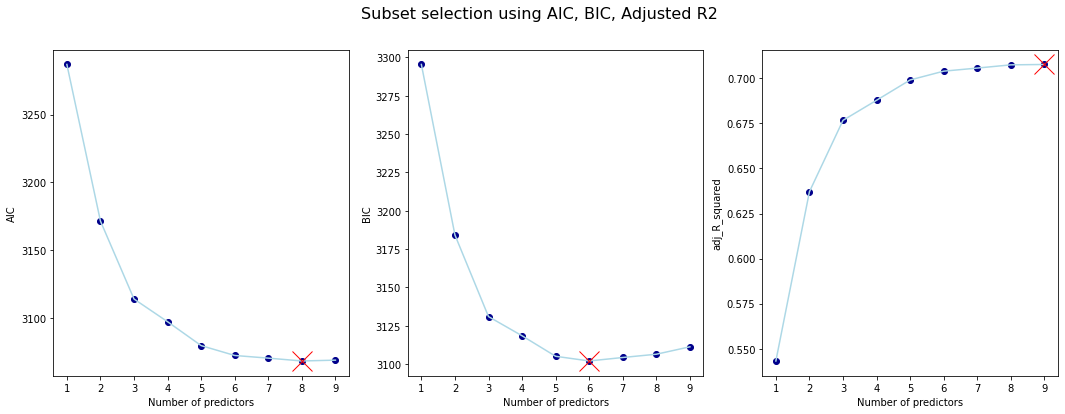

In [80]:
fig = plt.figure(figsize=(18,6))  # Create a figure object with specified dimensions.

for i, v in enumerate(standards):  # Loop through the model selection criteria.
    ax = fig.add_subplot(1, len(standards), i+1)  # Create a subplot for each criterion.
    ax.plot(df_maxRsqr['numb_features'], df_maxRsqr[v], color='lightblue')  # Plot a line for the criterion values.
    ax.scatter(df_maxRsqr['numb_features'], df_maxRsqr[v], color='darkblue')  # Overlay dots on the line plot.
    if v == 'adj_R_squared':  # Check if the current criterion is 'adj_R_squared'.
        ax.plot(df_maxRsqr[v].idxmax(), df_maxRsqr[v].max(), marker='x', markersize=20, color='r')  # Mark the maximum for adjusted R^2 with a red 'X'.
    else:
        ax.plot(df_maxRsqr[v].idxmin(), df_maxRsqr[v].min(), marker='x', markersize=20, color='r')  # For AIC and BIC, mark the minimum with a red 'X'.
    ax.set_xlabel('Number of predictors')  # Set the x-axis label.
    ax.set_ylabel(v)  # Set the y-axis label to the current criterion.

fig.suptitle('Subset selection using AIC, BIC, Adjusted R2', fontsize=16)  # Set the main title for the figure.
plt.show()  # Display the figure.

# Forward Stepwise Selection

In [81]:
#Initialization variables
y = df_dummy['MEDV']
X = df_dummy.drop(columns=['ZN','INDUS','NOX','RAD','MEDV'])     # we don't include these variables in X
p = 9

remaining_features = list(X.columns.values)  # Initialize the list of features still available for selection.
features = []  # Initialize the list to store selected features.
RSS_list, R_squared_list, adj_R_squared_list, AIC_list, BIC_list = [],[],[],[],[]  # Initialize lists to store metrics for each model.
features_list = dict()  # Initialize a dictionary to map the number of features to the selected features at that step.

for i in range(1, p+1):  # Loop over the desired number of features.
    best_RSS = np.inf  # Set the RSS for comparison to infinity at the start of each iteration.
    
    for f in itertools.combinations(remaining_features, 1):  # Iterate over each remaining feature.
        X_c = sm.add_constant(X[list(f) + features])  # Add a constant to the predictors for the current combination.
        model = sm.OLS(y, X_c).fit()  # Fit the linear model.
        
        if model.ssr < best_RSS:  # If the current model's RSS is lower than the best so far, update the best metrics.
            best_RSS = model.ssr  # Update the best RSS.
            best_R_squared = model.rsquared  # Update the best R-squared.
            best_feature = f[0]  # Update the best feature selected in this iteration.
            best_aic = model.aic  # Update the best AIC.
            best_bic = model.bic  # Update the best BIC.
            best_adj_R_squared = model.rsquared_adj  # Update the best adjusted R-squared.

    #Updating variables for next loop
    features.append(best_feature)  # Add the best feature of this iteration to the selected features list.
    remaining_features.remove(best_feature)  # Remove the selected feature from the list of remaining features.
    
    #Saving values for plotting
    RSS_list.append(best_RSS)  # Append the best RSS of this iteration to the RSS list.
    R_squared_list.append(best_R_squared)  # Append the best R-squared of this iteration to the R_squared list.
    AIC_list.append(best_aic)  # Append the best AIC of this iteration to the AIC list.
    BIC_list.append(best_bic)  # Append the best BIC of this iteration to the BIC list.
    adj_R_squared_list.append(best_adj_R_squared)  # Append the best adjusted R-squared of this iteration to the adj_R_squared list.
    features_list[i] = features.copy()  # Map the current number of features to the selected features list in the dictionary.

In [82]:
# store results in df_results, which is a joint of df_features and df_values
# Combine features and values into a single DataFrame directly, setting the index appropriately
df_results = pd.DataFrame({
    'numb_features': range(1, len(RSS_list) + 1),  # Create a column for the number of features
    'features': list(features_list.values()),  # Use the values from features_list
    'RSS': RSS_list,
    'R_squared': R_squared_list,
    'AIC': AIC_list,
    'BIC': BIC_list,
    'adj_R_squared': adj_R_squared_list
})

df_results.index = df_results['numb_features']

df_results

,numb_features,features,RSS,R_squared,AIC,BIC,adj_R_squared
numb_features,,,,,,,
1,1,[LSTAT],19472.38,0.54,3286.97,3295.43,0.54
2,2,"[LSTAT, RM]",15439.31,0.64,3171.54,3184.22,0.64
3,3,"[LSTAT, RM, PTRATIO]",13727.99,0.68,3114.10,3131.00,0.68
4,4,"[LSTAT, RM, PTRATIO, DIS]",13228.91,0.69,3097.36,3118.49,0.69
5,5,"[LSTAT, RM, PTRATIO, DIS, B]",12726.27,0.70,3079.76,3105.12,0.70
6,6,"[LSTAT, RM, PTRATIO, DIS, B, CHAS_1.0]",12495.08,0.71,3072.48,3102.07,0.70
7,7,"[LSTAT, RM, PTRATIO, DIS, B, CHAS_1.0, AGE]",12397.81,0.71,3070.53,3104.34,0.71
8,8,"[LSTAT, RM, PTRATIO, DIS, B, CHAS_1.0, AGE, CRIM]",12297.91,0.71,3068.43,3106.47,0.71
9,9,"[LSTAT, RM, PTRATIO, DIS, B, CHAS_1.0, AGE, CR...",12264.20,0.71,3069.04,3111.31,0.71


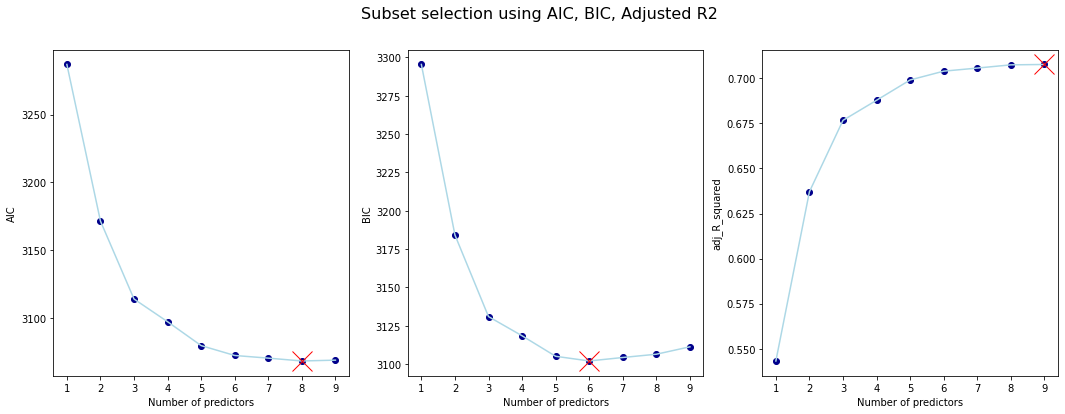

In [83]:
standards = ['AIC','BIC','adj_R_squared']  # Define the list of standards (criteria) for model evaluation.
fig = plt.figure(figsize=(18,6))  # Initialize a figure object with specific dimensions.

for i, v in enumerate(standards):  # Iterate over the standards, getting both index and value.
    ax = fig.add_subplot(1, len(standards), i+1)  # Create a subplot for each standard in a 1-row layout.
    ax.plot(df_results['numb_features'], df_results[v], color='lightblue')  # Plot each standard's values as a line.
    ax.scatter(df_results['numb_features'], df_results[v], color='darkblue')  # Overlay a scatter plot for detailed points.
    if v == 'adj_R_squared':  # Check if the current standard is adjusted R-squared.
        # For adj_R_squared, mark its maximum value with a red 'X'.
        ax.plot(df_results[v].idxmax(), df_results[v].max(), marker='x', markersize=20, color='r')
    else:
        # For AIC and BIC, mark their minimum value with a red 'X'.
        ax.plot(df_results[v].idxmin(), df_results[v].min(), marker='x', markersize=20, color='r')
    ax.set_xlabel('Number of predictors')  # Set the x-axis label as 'Number of predictors'.
    ax.set_ylabel(v)  # Set the y-axis label as the name of the current standard.

fig.suptitle('Subset selection using AIC, BIC, Adjusted R2', fontsize=16)  # Set a title for the entire figure.
plt.show()  # Display the figure.


## We can define a function to encapsulate the two methods

In [84]:
# Function for Best Subset Selection
def best_subset(y, X):
    from tqdm import tnrange  # Import tnrange for progress bar in loops

    # Initialize lists to store the results for each model
    RSS_list, R_squared_list, adj_R_squared_list, AIC_list, BIC_list, feature_list = [], [], [], [], [], []
    numb_features = []  # To store the number of features used in each model

    # Calculate the total number of features available
    p = len(X.columns)

    # Loop over the number of features 'k' from 1 to 'p' (inclusive)
    for k in tnrange(1, p + 1, desc='Loop...'):

        # Loop over all possible combinations of 'k' features
        for combo in itertools.combinations(X.columns, k):
            # Prepare the design matrix for the current combination of features and add a constant term
            X_c = sm.add_constant(X[list(combo)])
            # Fit the linear regression model using OLS
            model = sm.OLS(y, X_c).fit()

            # Store the metrics and the current feature combination
            RSS_list.append(model.ssr)  # Sum of squared residuals
            R_squared_list.append(model.rsquared)  # R-squared
            adj_R_squared_list.append(model.rsquared_adj)  # Adjusted R-squared
            AIC_list.append(model.aic)  # AIC
            BIC_list.append(model.bic)  # BIC
            feature_list.append(combo)  # Current combination of features
            numb_features.append(k)  # Number of features in the current model

    # Combine the collected metrics into a DataFrame for easy analysis
    df_results = pd.DataFrame({
        'numb_features': numb_features,
        'features': feature_list,
        'RSS': RSS_list,
        'R_squared': R_squared_list,
        'adj_R_squared': adj_R_squared_list,
        'AIC': AIC_list,
        'BIC': BIC_list
    })
    
    return df_results


In [ ]:
# Function for Forward Stepwise

def forward_stepwise(y, X, remaining_features):
    features = []  # List to store selected features at each step
    # Initialize lists to store metrics for evaluation
    RSS_list, R_squared_list, adj_R_squared_list, AIC_list, BIC_list = [], [], [], [], [] 
    features_list = dict()  # Dictionary to map step number to the list of features selected until that step
    
    p = len(remaining_features)  # Total number of features available for selection
    
    for i in range(1, p + 1):  # Loop through all possible number of features
        best_RSS = np.inf  # Initialize the best RSS value as infinity for comparison

        # Loop through all remaining features to find the best feature to add
        for f in itertools.combinations(remaining_features, 1):
            # Prepare design matrix for current feature set and add a constant term
            X_c = sm.add_constant(X[list(f) + features])
            # Fit OLS model with current feature set
            model = sm.OLS(y, X_c).fit()

            # Check if the current model has a lower RSS than the best found so far
            if model.ssr < best_RSS:
                # Update best model metrics
                best_RSS = model.ssr
                best_R_squared = model.rsquared
                best_feature = f[0]
                best_aic = model.aic
                best_bic = model.bic
                best_adj_R_squared = model.rsquared_adj

        # Update lists with the best model's metrics for the current number of features
        features.append(best_feature)  # Add the best feature of this iteration to the selection
        remaining_features.remove(best_feature)  # Remove the selected feature from the pool of remaining features

        # Record metrics for the best model at this step
        RSS_list.append(best_RSS)
        R_squared_list.append(best_R_squared)
        AIC_list.append(best_aic)
        BIC_list.append(best_bic)
        adj_R_squared_list.append(best_adj_R_squared)
        features_list[i] = features.copy()  # Copy the current list of selected features

    # Compile all metrics and feature selections into a DataFrame for analysis
    df_results = pd.DataFrame({
        'numb_features': range(1, len(RSS_list) + 1),  # Number of features selected
        'features': list(features_list.values()),  # Selected features at each step
        'RSS': RSS_list,
        'R_squared': R_squared_list,
        'AIC': AIC_list,
        'BIC': BIC_list,
        'adj_R_squared': adj_R_squared_list
    })
    
    df_results.index = df_results['numb_features']  # Set the DataFrame index to the number of features for easy lookup

    return df_results


In [86]:
# Function for plot
def plot_selection(df_results, standards):  
    fig = plt.figure(figsize=(18,6))  # Create a figure with specified dimensions

    for i, v in enumerate(standards):  # Loop through the list of standards
        ax = fig.add_subplot(1, len(standards), i+1)  # Add a subplot for each standard
        ax.plot(df_results['numb_features'], df_results[v], color='lightblue')  # Plot the values of each standard in light blue
        ax.scatter(df_results['numb_features'], df_results[v], color='darkblue')  # Overlay a scatter plot in dark blue
        if v == 'adj_R_squared':  # Check if the current standard is adjusted R-squared
            ax.plot(df_results[v].idxmax(), df_results[v].max(), marker='x', markersize=20, color='r')  # Highlight the maximum value for adjusted R-squared with a red 'X'
        else:
            ax.plot(df_results[v].idxmin(), df_results[v].min(), marker='x', markersize=20, color='r')  # Highlight the minimum value for other standards with a red 'X'
        ax.set_xlabel('Number of predictors')  # Label the x-axis as 'Number of predictors'
        ax.set_ylabel(v)  # Label the y-axis with the name of the current standard

    fig.suptitle('Subset selection using ' + ", ".join(standards), fontsize=16)  # Set the title of the figure with the names of the standards
    plt.show()  # Display the plot

## Best subset vs. forward stepwise

In [87]:
#Initialization variables
y = df_dummy['MEDV']
X = df_dummy.drop(columns=['ZN','INDUS','NOX','RAD','AGE','PTRATIO','B','MEDV']) # we don't include these variables in X
df_results_BS = best_subset(y, X)

Loop...:   0%|          | 0/6 [00:00<?, ?it/s]

In [88]:
df_results_BS

,numb_features,features,RSS,R_squared,adj_R_squared,AIC,BIC
0,1,"(CRIM,)",36275.51,0.15,0.15,3601.78,3610.23
1,1,"(RM,)",22061.88,0.48,0.48,3350.15,3358.60
2,1,"(DIS,)",40048.05,0.06,0.06,3651.84,3660.30
3,1,"(TAX,)",33338.96,0.22,0.22,3559.07,3567.52
4,1,"(LSTAT,)",19472.38,0.54,0.54,3286.97,3295.43
...,...,...,...,...,...,...,...
58,5,"(CRIM, RM, DIS, LSTAT, CHAS_1.0)",14238.48,0.67,0.66,3136.57,3161.93
59,5,"(CRIM, RM, TAX, LSTAT, CHAS_1.0)",14404.72,0.66,0.66,3142.45,3167.81
60,5,"(CRIM, DIS, TAX, LSTAT, CHAS_1.0)",17344.71,0.59,0.59,3236.43,3261.79
61,5,"(RM, DIS, TAX, LSTAT, CHAS_1.0)",13864.03,0.68,0.67,3123.09,3148.45


In [89]:
#Initialization variables
y = df_dummy['MEDV']
X = df_dummy.drop(columns=['ZN','INDUS','NOX','RAD','AGE','PTRATIO','B','MEDV']) # we don't include these variables in X
remaining_features = list(X.columns.values)               # Initialize the remaining features as all features
df_results_FS = forward_stepwise(y, X, remaining_features)

In [90]:
df_results_FS

,numb_features,features,RSS,R_squared,AIC,BIC,adj_R_squared
numb_features,,,,,,,
1,1,[LSTAT],19472.38,0.54,3286.97,3295.43,0.54
2,2,"[LSTAT, RM]",15439.31,0.64,3171.54,3184.22,0.64
3,3,"[LSTAT, RM, CHAS_1.0]",14890.78,0.65,3155.24,3172.14,0.65
4,4,"[LSTAT, RM, CHAS_1.0, TAX]",14477.24,0.66,3142.99,3164.12,0.66
5,5,"[LSTAT, RM, CHAS_1.0, TAX, DIS]",13864.03,0.68,3123.09,3148.45,0.67
6,6,"[LSTAT, RM, CHAS_1.0, TAX, DIS, CRIM]",13772.85,0.68,3121.75,3151.33,0.67


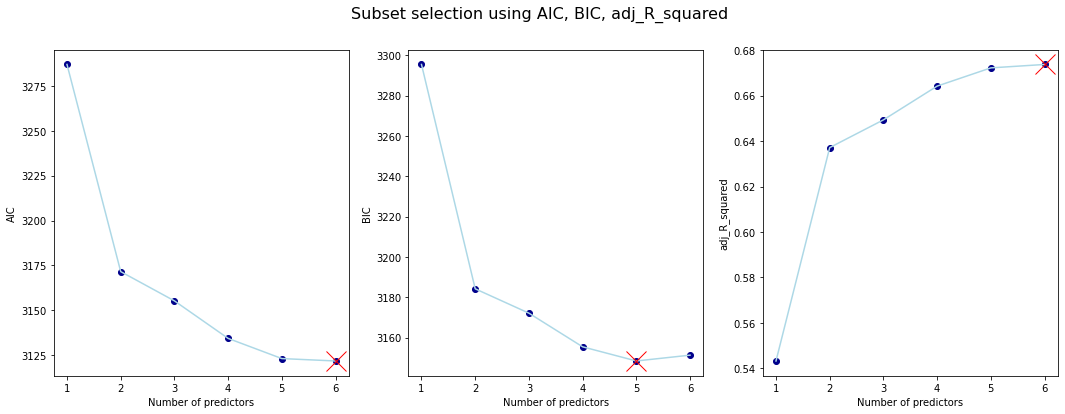

In [91]:
# Group by 'numb_features' and find the index of the maximum 'R_squared' within each group
idx_max_rsqr = df_results_BS.groupby('numb_features')['R_squared'].idxmax()
# Use the indices to select the rows corresponding to the maximum 'R_squared' for each 'numb_features'
df_maxRsqr = df_results_BS.loc[idx_max_rsqr]
df_maxRsqr.index = df_maxRsqr.numb_features

standards = ['AIC','BIC','adj_R_squared']
plot_selection(df_maxRsqr, standards)

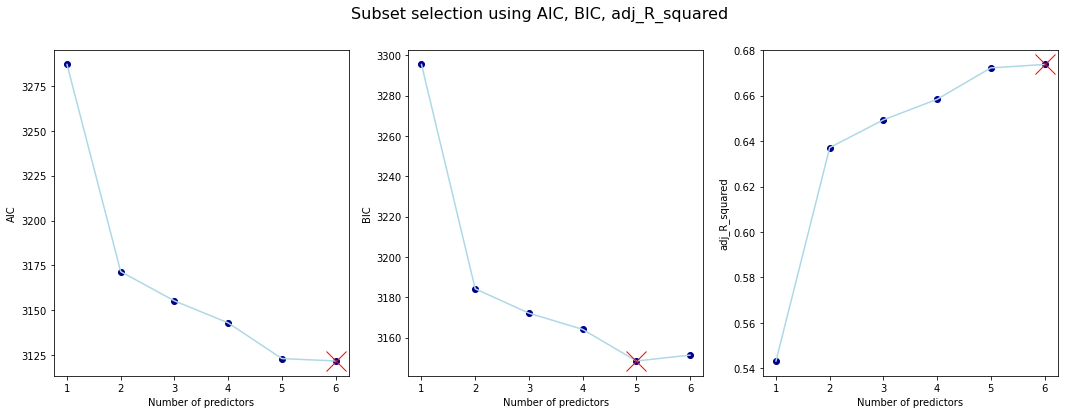

In [92]:
standards = ['AIC','BIC','adj_R_squared']
plot_selection(df_results_FS, standards)